<a href="https://colab.research.google.com/github/tlmartiner/Aprendizaje_No_Supervisado/blob/main/Clase_10_clusternlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googletrans==4.0.0-rc1
!pip install language-tool-python
!pip install translate
!pip install unidecode
!pip install pyLDAvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 765.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 1.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=e0ffdcd127fcccdbc985c37a3981ba5ecc31e7827c42148f968718aa51b9269f
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0

In [ ]:
from google.colab import drive # conectar con datos de drive
drive.mount('/content/gdrive')
from googletrans import Translator
import language_tool_python
import pandas as pd # manejo de data frame
import numpy as np # manejos matriciales
import nltk # paquete 1 de lenguaje natural
import spacy # paquete 2 de lenguaje natural
import re # paquete 2 de lenguaje natural
from textblob import TextBlob  #
from unidecode import unidecode
import seaborn as sns # graficos
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords # conjunto de stopwords
from nltk.tokenize import TweetTokenizer # tokenizador de tweet
from nltk.stem import PorterStemmer # hacer steming palabras
from nltk.stem import LancasterStemmer # hacer steming palabras
from nltk.stem import WordNetLemmatizer # extraer el lema de una palabra
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud  # graficos de palabras
from transformers import MarianMTModel, MarianTokenizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
# from translate import Translator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import (KMeans, AgglomerativeClustering, DBSCAN)
from sklearn.decomposition import PCA # Análisis de componentes principales
from scipy.cluster.hierarchy import dendrogram,  linkage # Dendograma
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min

Mounted at /content/gdrive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Representación de características



In [ ]:
textos = [
    "Los gatos son animales muy independientes y les gusta explorar.",
    "Los perros suelen ser más leales y disfrutan de la compañía humana.",
    "En la ciudad, muchos animales domésticos conviven con sus dueños.",
    "Las ciudades grandes tienden a tener parques donde los perros juegan.",
    "A los gatos les gusta dormir en lugares tranquilos y altos.",
    "Los perros suelen ser entrenados para realizar tareas específicas.",
    "En la naturaleza, los animales salvajes como los lobos cazan en grupo.",
    "Los felinos, como los gatos y tigres, tienen un instinto cazador muy fuerte."
]


In [ ]:
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(textos)
X_counts.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 

## CountVectorizer

transforma el texto en una matriz basada en la frecuencia de las palabras en cada documento. Cada columna representa una palabra en el vocabulario, y cada fila es un documento. Los valores indican cuántas veces aparece cada palabra en el texto correspondiente.


In [ ]:
count_vectorizer.get_feature_names_out()

array(['altos', 'animales', 'cazador', 'cazan', 'ciudad', 'ciudades',
       'como', 'compañía', 'con', 'conviven', 'de', 'disfrutan',
       'domésticos', 'donde', 'dormir', 'dueños', 'en', 'entrenados',
       'específicas', 'explorar', 'felinos', 'fuerte', 'gatos', 'grandes',
       'grupo', 'gusta', 'humana', 'independientes', 'instinto', 'juegan',
       'la', 'las', 'leales', 'les', 'lobos', 'los', 'lugares', 'muchos',
       'muy', 'más', 'naturaleza', 'para', 'parques', 'perros',
       'realizar', 'salvajes', 'ser', 'son', 'suelen', 'sus', 'tareas',
       'tener', 'tienden', 'tienen', 'tigres', 'tranquilos', 'un'],
      dtype=object)

In [ ]:
df_counts = pd.DataFrame(X_counts.toarray(), columns=count_vectorizer.get_feature_names_out())
(df_counts["los"])

,los
0,1
1,1
2,0
3,1
4,1
5,1
6,2
7,2


In [ ]:
df_counts

,altos,animales,cazador,cazan,ciudad,ciudades,como,compañía,con,conviven,...,son,suelen,sus,tareas,tener,tienden,tienen,tigres,tranquilos,un
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
6,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1


## TfidfVectorizer

(Term Frequency-Inverse Document Frequency) transforma el texto en una matriz donde cada valor es un peso que representa la importancia de la palabra en relación con todo el corpus. Esto ayuda a reducir el impacto de palabras muy comunes y destacar términos más relevantes.

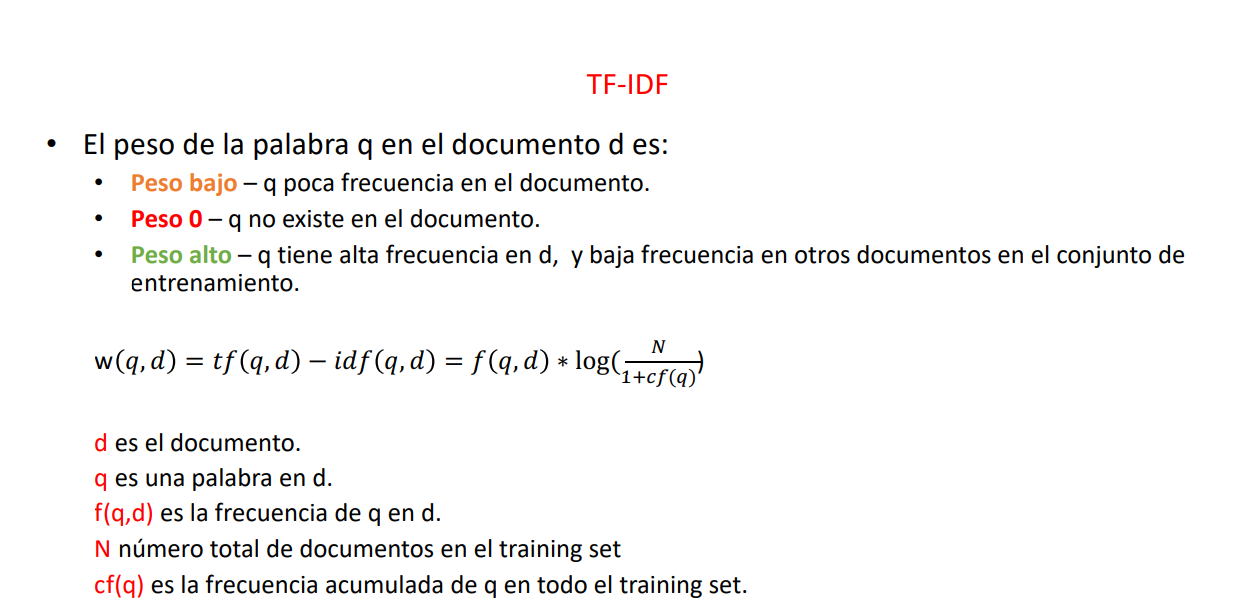

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(textos)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_tfidf["los"]

,los
0,0.177109
1,0.151775
2,0.000000
3,0.151145
4,0.173100
5,0.167208
6,0.287580
7,0.286286


In [ ]:
df_tfidf

,altos,animales,cazador,cazan,ciudad,ciudades,como,compañía,con,conviven,...,son,suelen,sus,tareas,tener,tienden,tienen,tigres,tranquilos,un
0,0.000000,0.286936,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.396763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.34001,0.000000,0.000000,...,0.000000,0.284955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.247052,0.000000,0.000000,0.341613,0.000000,0.000000,0.00000,0.341613,0.341613,...,0.000000,0.000000,0.341613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.338599,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.338599,0.338599,0.000000,0.000000,0.000000,0.000000
4,0.387783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387783,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.313928,0.000000,0.374581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.232955,0.000000,0.322121,0.000000,0.000000,0.269962,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.320671,0.000000,0.000000,0.000000,0.268747,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320671,0.320671,0.000000,0.320671


# Mensajes de texto

Se cuenta con una base de datos de mensajes de texto, se tiene una columna de clasificación:

- Spam: Mensaje no deseado o de contenido no solicitado, como publicidad, promociones engañosas o intentos de phishing.

- Ham: Se refiere a mensajes deseados, legítimos y no comerciales, que no tienen intención maliciosa o publicitaria.

In [ ]:
datos_spam= pd.read_csv("/content/gdrive/MyDrive/Aprendizaje no supervisado/2024-2/Bases de datos/Spam_SMS.csv")

In [ ]:
datos_spam.columns

Index(['Class', 'Message'], dtype='object')

In [ ]:
datos_spam["Class"].value_counts()

,count
Class,
ham,4827
spam,747


Se tiene 747 mensajes no deseados ¿es apropiado realizar un análisis de sentimientos?

El sentimiento del texto tiene relación con la clasificación de Spam o Ham?


In [ ]:
sia = SentimentIntensityAnalyzer() # Definimos el algoritmo base.
def analisis_sentimiento(texto ):
  """
  Recibe un texto
  Retorna el sentimiento del texto, negativo, positivo, neutral
  """
  sentimiento = sia.polarity_scores(texto)['compound']  # Devuelve un diccionario con los resultados}
  if sentimiento >0: # si es >0, es positivo
    etiqueta= "positivo"
  elif sentimiento <0: # si es <0, es negativo
    etiqueta= "negativo"
  else: # en caso contrario = 0, es neutral.
    etiqueta= "neutral"
  return etiqueta

In [ ]:
datos_spam["sentimiento"]=datos_spam["Message"].apply(analisis_sentimiento)

In [ ]:
datos_spam["sentimiento"].value_counts()

,count
sentimiento,
positivo,2681
neutral,1864
negativo,1029


In [ ]:
datos_spam["Class"].value_counts()

,count
Class,
ham,4827
spam,747


In [ ]:
tabla_frecuencia_relacion= datos_spam.groupby('Class')['sentimiento'].value_counts(normalize=True)
tabla_frecuencia_relacion

Class  sentimiento
ham    positivo       0.442511
       neutral        0.366687
       negativo       0.190802
spam   positivo       0.729585
       negativo       0.144578
       neutral        0.125837
Name: proportion, dtype: float64

¿Es necesario el reconocimiento de entidades?

¿cuáles serían las entidades que se podrían considerar?


### Entidades Reconocidas por `spacy.load("en_core_web_sm")`:

1. **PERSON**: Personas, figuras famosas o personajes ficticios.
   - Ejemplo: "Barack Obama", "Harry Potter".

2. **NORP**: Grupos étnicos, religiosos o políticos.
   - Ejemplo: "American", "Christian", "Communist".

3. **FAC**: Edificios, aeropuertos, carreteras, puentes, etc.
   - Ejemplo: "Eiffel Tower", "Wall Street".

4. **ORG**: Organizaciones, incluyendo compañías, agencias gubernamentales, instituciones.
   - Ejemplo: "Google", "United Nations", "NASA".

5. **GPE**: Países, ciudades o estados.
   - Ejemplo: "France", "New York", "California".

6. **LOC**: Lugares no geopolíticos (montañas, ríos, regiones).
   - Ejemplo: "Mount Everest", "Sahara Desert".

7. **PRODUCT**: Productos o bienes tangibles (objetos físicos).
   - Ejemplo: "iPhone", "Ford Mustang".

8. **EVENT**: Eventos nombrados, incluyendo guerras, concursos deportivos, desastres, etc.
   - Ejemplo: "World War II", "Super Bowl", "Olympics".

9. **WORK_OF_ART**: Títulos de obras de arte, libros, canciones, películas, etc.
   - Ejemplo: "The Mona Lisa", "Inception", "Bohemian Rhapsody".

10. **LAW**: Documentos legales nombrados.
   - Ejemplo: "Constitution", "The Magna Carta".

11. **LANGUAGE**: Idiomas.
   - Ejemplo: "English", "Spanish", "Mandarin".

12. **DATE**: Fechas, períodos de tiempo o cualquier expresión de tiempo.
   - Ejemplo: "June 25, 2023", "next Monday", "two weeks".

13. **TIME**: Tiempos dentro del día.
   - Ejemplo: "2:30 PM", "midnight", "morning".

14. **PERCENT**: Porcentajes.
   - Ejemplo: "50%", "20 percent".

15. **MONEY**: Cantidades monetarias.
   - Ejemplo: "$100", "500 euros", "10 dollars".

16. **QUANTITY**: Cantidades de unidades.
   - Ejemplo: "10 kilograms", "5 liters", "several meters".

17. **ORDINAL**: Números ordinales.
   - Ejemplo: "first", "second", "third".

18. **CARDINAL**: Números cardinales que no caen bajo otra categoría.
   - Ejemplo: "one", "two", "100"

In [ ]:

nlp = spacy.load("en_core_web_sm") # lectura del modelo
def extraer_entidades(texto):
  """
  Por cada noticia vamos a extraer la entidad de ORG, GPE y PERSON
  Retorna un texto con las entidades separadas por ,
  """
  doc = nlp(texto) # aplicamos el algoritmo
  entidades=[] # entidades
  # entidades=[w.text for w in doc.ents if w.label_  in ["ORG", "GPE", "PERSON"]]
  for ent in doc.ents:
    if ent.label_  in ["ORG", "GPE", "PERSON"]:
      entidades.append(ent.text) # añadimos a la lista
  entidades=','.join(entidades) # unimos la lista por comas
  entidades=entidades.lower() # todo a minúsculas
  return entidades

In [ ]:
def meciona_dinero(texto):
  """
  Recibe un texto
  Retorna si menciona dinero
  """
  doc = nlp(texto) # aplicamos el algoritmo
  entidades=[] # entidades
  # entidades=[w.text for w in doc.ents if w.label_  in ["ORG", "GPE", "PERSON"]]
  for ent in doc.ents:
    if ent.label_  in ["MONEY"]:
      return "Si"
  return "No"

In [ ]:
datos_spam["menciona_dinero"]= datos_spam["Message"].apply(meciona_dinero)

In [ ]:
datos_spam.groupby("Class")["menciona_dinero"].value_counts(normalize=True)

Class  menciona_dinero
ham    No                 0.995235
       Si                 0.004765
spam   No                 0.748327
       Si                 0.251673
Name: proportion, dtype: float64

In [ ]:
datos_spam["entidades"] = datos_spam["Message"].apply(extraer_entidades)

In [ ]:
join_text = ",".join(datos_spam["entidades"])
pd.Series(join_text.split(",")).value_counts().iloc[0:20]

,count
,4126
nokia,38
uk,23
t&c,20
free,16
po box,15
win,15
guaranteed,15
babe,13
un,13


¿Cómo se debería limpiear el texto?

In [ ]:
stop_words_nltk_en =list(set(stopwords.words('english')))
stop_words_nltk_en =["u","ok", *stop_words_nltk_en]
stop_words_nltk_es =list(set(stopwords.words('spanish')))
def texto_limpio(texto, idioma ="en"):
  """
  Recibe un texto
  Retorna un texto sin simbolos, sin stopwords, en minusculas
  idioma = en (inglés) o es (español)
  """
  texto_limpio=str(texto).lower()
  # blob = TextBlob(texto_limpio )
  # texto_limpio= blob.correct().string
  if idioma=="es":
    texto_limpio = unidecode(texto_limpio) # elimina los acentos y ñ
  texto_limpio= re.sub(r"[^A-Za-z]+",' ',texto_limpio) # Eliminar simbolos
  texto_limpio = texto_limpio.split() # seperacion de tokens
  if idioma=="en":
    texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_en] # eliminacción de stop word
  elif idioma=="es":
    texto_limpio=[w for w in texto_limpio if w not in stop_words_nltk_es] # eliminacción de stop word
  texto_limpio=' '.join(texto_limpio)
  return texto_limpio

In [ ]:
datos_spam["Message_limpio"]=datos_spam["Message"].apply(texto_limpio)

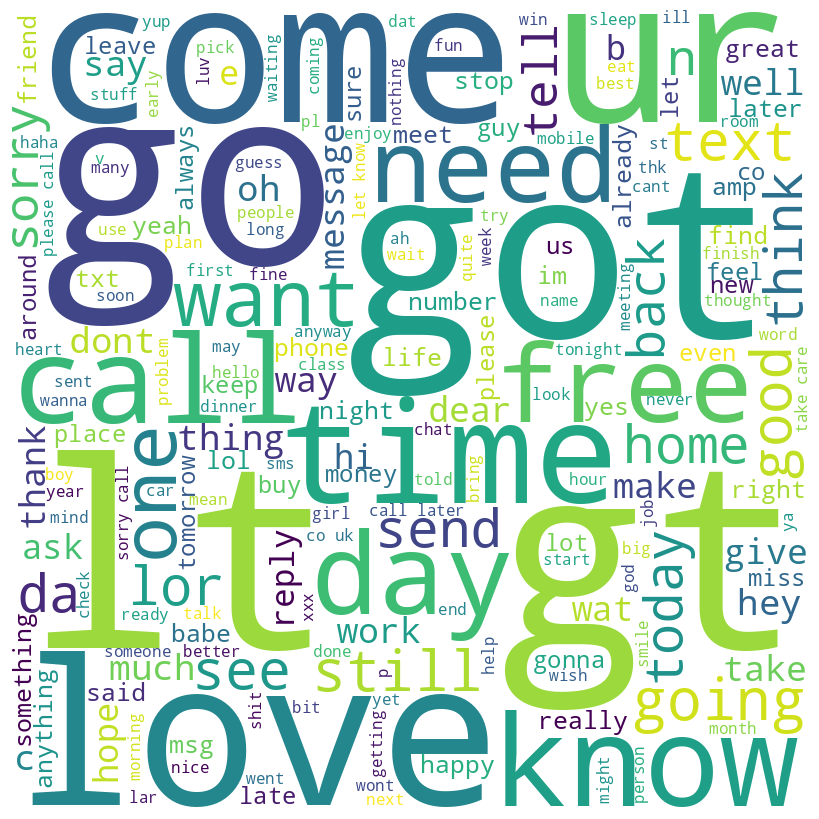

In [ ]:
texto_join =  " ".join(datos_spam["Message_limpio"])
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(texto_join)
 # mostrar nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Clúster

In [ ]:
# Crear un vectorizador de frecuencia de palabras
count_vectorizer = CountVectorizer(max_features= 4000,min_df=10 )
X_count = count_vectorizer.fit_transform(datos_spam["Message_limpio"])

print("Matriz Bag of Words:\n", X_count.toarray())
print("Características (vocabulario):\n", count_vectorizer.get_feature_names_out())

Matriz Bag of Words:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Características (vocabulario):
 ['abiola' 'able' 'abt' 'ac' 'account' 'across' 'actually' 'address'
 'admirer' 'aft' 'afternoon' 'age' 'ago' 'ah' 'aight' 'almost' 'alone'
 'already' 'alright' 'also' 'always' 'amp' 'angry' 'another' 'ans'
 'answer' 'anyone' 'anything' 'anytime' 'anyway' 'apply' 'ard' 'area'
 'around' 'asap' 'ask' 'askd' 'asked' 'asking' 'ass' 'attempt' 'auction'
 'available' 'await' 'award' 'awarded' 'away' 'awesome' 'babe' 'baby'
 'back' 'bad' 'balance' 'bank' 'bath' 'bathe' 'bb' 'bcoz' 'beautiful'
 'bed' 'believe' 'best' 'better' 'big' 'birthday' 'bit' 'blue' 'bonus'
 'book' 'booked' 'bored' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring'
 'brother' 'bslvyl' 'bt' 'bus' 'busy' 'buy' 'call' 'called' 'caller'
 'calling' 'calls' 'camcorder' 'came' 'camera' 'cant' 'car' 'card' 'care'
 'carlos' 'case' 'cash' 'cause' 'chance' 'change' 'cha

In [ ]:
X_count.shape

(5574, 880)

In [ ]:
texto_num=  pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())
( texto_num.sum( ).sort_values(ascending=False)).describe()

,0
count,880.000000
mean,37.343182
std,48.585338
min,10.000000
25%,14.000000
50%,21.000000
75%,38.000000
max,608.000000


In [ ]:
X_count.shape

(5574, 7622)

In [ ]:
# Usar el mismo conjunto de textos
tfidf_vectorizer = TfidfVectorizer(min_df=10)
X_tfidf = tfidf_vectorizer.fit_transform(datos_spam["Message_limpio"])
print("Matriz TF-IDF:\n", X_tfidf.toarray())
print("Características (vocabulario):\n", tfidf_vectorizer.get_feature_names_out())

Matriz TF-IDF:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Características (vocabulario):
 ['abiola' 'able' 'abt' 'ac' 'account' 'across' 'actually' 'address'
 'admirer' 'aft' 'afternoon' 'age' 'ago' 'ah' 'aight' 'almost' 'alone'
 'already' 'alright' 'also' 'always' 'amp' 'angry' 'another' 'ans'
 'answer' 'anyone' 'anything' 'anytime' 'anyway' 'apply' 'ard' 'area'
 'around' 'asap' 'ask' 'askd' 'asked' 'asking' 'ass' 'attempt' 'auction'
 'available' 'await' 'award' 'awarded' 'away' 'awesome' 'babe' 'baby'
 'back' 'bad' 'balance' 'bank' 'bath' 'bathe' 'bb' 'bcoz' 'beautiful'
 'bed' 'believe' 'best' 'better' 'big' 'birthday' 'bit' 'blue' 'bonus'
 'book' 'booked' 'bored' 'bout' 'box' 'boy' 'boytoy' 'break' 'bring'
 'brother' 'bslvyl' 'bt' 'bus' 'busy' 'buy' 'call' 'called' 'caller'
 'calling' 'calls' 'camcorder' 'came' 'camera' 'cant' 'car' 'card' 'care'
 'carlos' 'case' 'cash' 

In [ ]:
pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out() ).sum().sort_values(ascending=False)

,0
call,143.322069
get,107.242299
ur,88.589747
gt,82.931778
lt,82.512445
...,...
hg,3.254734
rates,3.223409
ldn,3.115275
clean,2.675812


## K-means

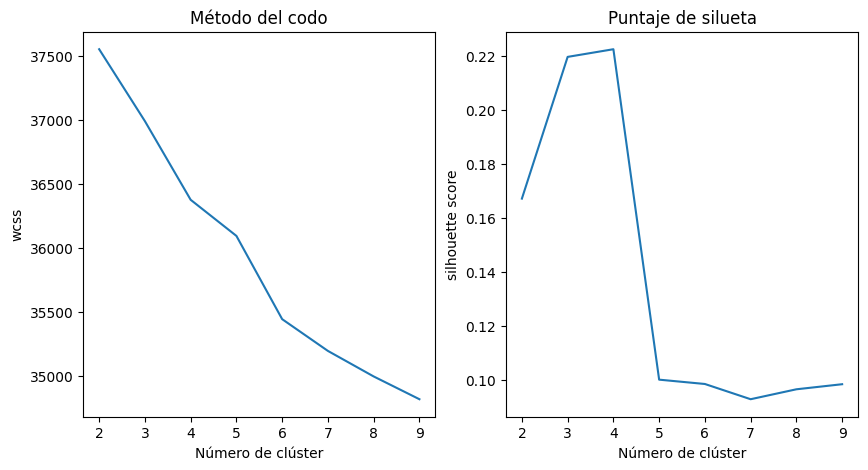

In [ ]:
silueta_score=[] # puntaje de silueta
wcss =[] #
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k, random_state=42)
  k_means.fit(X_count)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(X_count, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

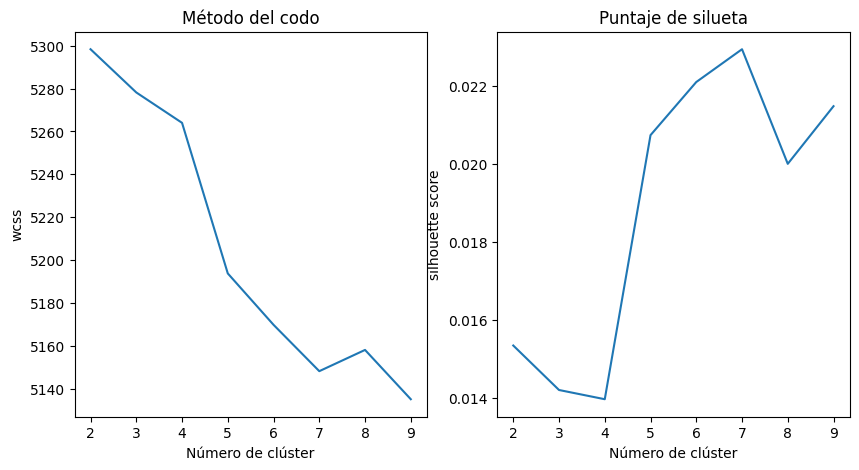

In [ ]:
silueta_score=[] # puntaje de silueta
wcss =[] #
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k, random_state=42)
  k_means.fit(X_tfidf)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(X_tfidf, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()

In [ ]:
k_means=KMeans(7, random_state=42)
k_means.fit(X_tfidf)
datos_spam["labels_kmeans"]=k_means.labels_
datos_spam["labels_kmeans"].value_counts()

,count
labels_kmeans,
3,3811
6,491
1,473
5,255
4,228
0,178
2,138


In [ ]:
datos_spam.groupby("labels_kmeans")["Class"].value_counts(normalize=True)

labels_kmeans  Class
0              ham      0.966292
               spam     0.033708
1              spam     0.646934
               ham      0.353066
2              ham      0.963768
               spam     0.036232
3              ham      0.918132
               spam     0.081868
4              ham      1.000000
5              ham      0.988235
               spam     0.011765
6              ham      0.765784
               spam     0.234216
Name: proportion, dtype: float64

In [ ]:
datos_spam.groupby("labels_kmeans")["sentimiento"].value_counts(normalize=True)

labels_kmeans  sentimiento
0              positivo       0.825843
               negativo       0.168539
               neutral        0.005618
1              positivo       0.627907
               neutral        0.196617
               negativo       0.175476
2              neutral        0.456522
               positivo       0.376812
               negativo       0.166667
3              positivo       0.447652
               neutral        0.366046
               negativo       0.186303
4              positivo       0.442982
               neutral        0.355263
               negativo       0.201754
5              neutral        0.478431
               positivo       0.305882
               negativo       0.215686
6              positivo       0.610998
               neutral        0.221996
               negativo       0.167006
Name: proportion, dtype: float64

In [ ]:
datos_spam

,Class,Message,sentimiento,entidades,menciona_dinero,Message_limpio,labels_kmeans
0,ham,"Go until jurong point, crazy.. Available only ...",positivo,jurong point,No,go jurong point crazy available bugis n great ...,3
1,ham,Ok lar... Joking wif u oni...,positivo,,No,lar joking wif oni,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,positivo,,No,free entry wkly comp win fa cup final tkts st ...,3
3,ham,U dun say so early hor... U c already then say...,neutral,,No,dun say early hor c already say,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",negativo,nah,No,nah think goes usf lives around though,3
...,...,...,...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,positivo,bt,No,nd time tried contact pound prize claim easy c...,1
5570,ham,Will ü b going to esplanade fr home?,neutral,,No,b going esplanade fr home,5
5571,ham,"Pity, * was in mood for that. So...any other s...",negativo,,No,pity mood suggestions,3
5572,ham,The guy did some bitching but I acted like i'd...,positivo,,No,guy bitching acted like interested buying some...,0


Size of new BoW title = 1002


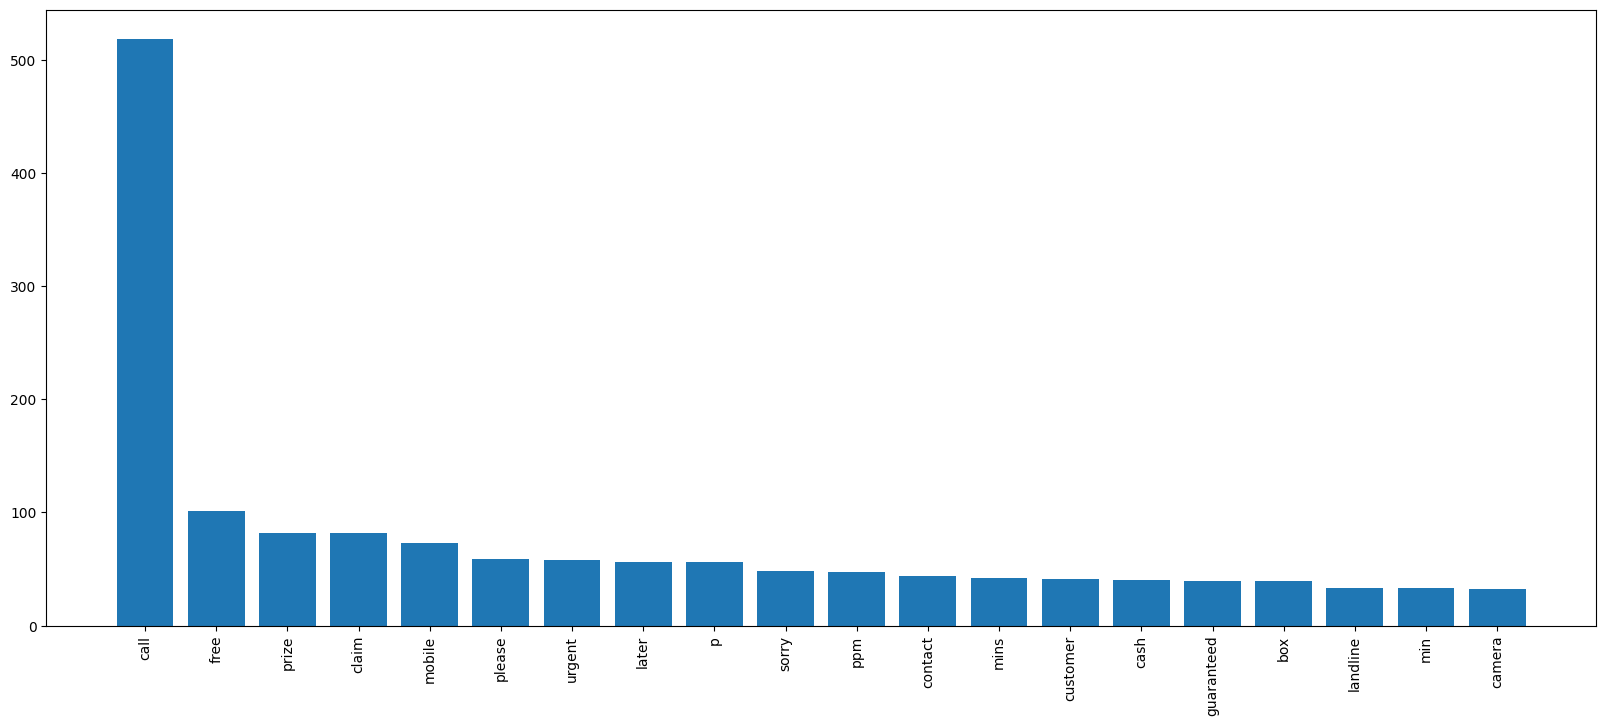

In [ ]:
filtro = datos_spam["labels_kmeans"]==1


texto_frecuencia =  " ".join(datos_spam.loc[filtro, "Message_limpio"])
tokens_=nltk.FreqDist(   texto_frecuencia.split() )

fdist = nltk.FreqDist(tokens_)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)

plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()


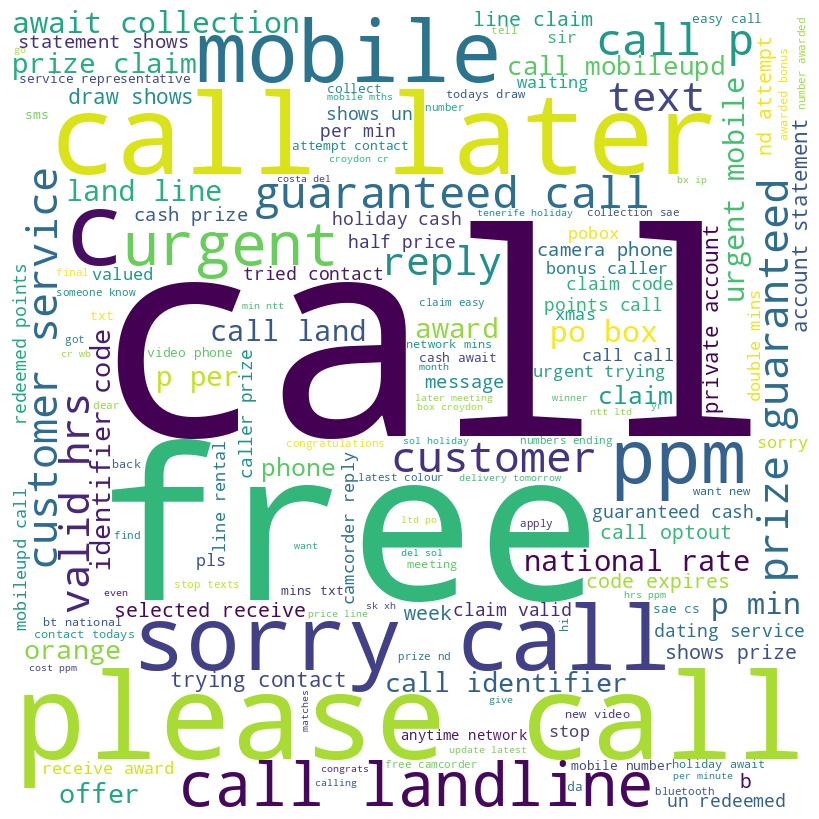

In [ ]:
texto_join =  " ".join(datos_spam.loc[filtro,"Message_limpio"])
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(texto_join)
 # mostrar nube de palabras
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## PCA

La representación de características puede tener dificultados por su alta dimensionalidad, por eso es necesario reducir la cantidad de


In [ ]:
X_count.shape

(5574, 880)

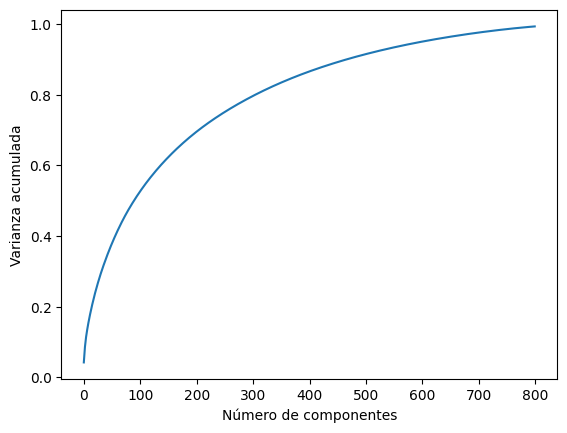

In [ ]:
pca= PCA(n_components=800)
pca.fit(X_count)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.show()

## LDA


In [ ]:
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models


In [ ]:
# Crear un vectorizador de frecuencia de palabras
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(datos_spam["Message_limpio"])
diccionario = corpora.Dictionary([count_vectorizer.get_feature_names_out() ])
corpus = [diccionario.doc2bow(texto.split()) for texto in datos_spam["Message_limpio"]]

# 3. Crear el modelo LDA con 2 temas
lda_modelo = LdaModel(corpus=corpus, id2word=diccionario, num_topics=7, random_state=42)

# 4. Mostrar los temas
temas = lda_modelo.print_topics()
for idx, tema in temas:
    print(f"Tema {idx+1}: {tema}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tema 1: 0.027*"gt" + 0.027*"lt" + 0.017*"call" + 0.010*"send" + 0.009*"please" + 0.008*"number" + 0.008*"love" + 0.007*"pls" + 0.006*"come" + 0.006*"right"
Tema 2: 0.017*"get" + 0.014*"text" + 0.011*"ur" + 0.009*"call" + 0.008*"hi" + 0.007*"reply" + 0.007*"stop" + 0.007*"free" + 0.006*"help" + 0.005*"back"
Tema 3: 0.008*"lor" + 0.008*"wat" + 0.008*"care" + 0.008*"take" + 0.007*"ur" + 0.007*"call" + 0.007*"pls" + 0.007*"wan" + 0.006*"stop" + 0.006*"time"
Tema 4: 0.012*"get" + 0.011*"call" + 0.011*"like" + 0.010*"time" + 0.010*"one" + 0.008*"see" + 0.008*"ur" + 0.008*"go" + 0.007*"know" + 0.006*"much"
Tema 5: 0.011*"go" + 0.010*"got" + 0.009*"lor" + 0.009*"call" + 0.009*"still" + 0.008*"want" + 0.006*"message" + 0.006*"see" + 0.005*"know" + 0.005*"weekend"
Tema 6: 0.016*"call" + 0.015*"day" + 0.012*"good" + 0.012*"sorry" + 0.011*"love" + 0.009*"make" + 0.009*"going" + 0.008*"later" + 0.008*"happy" + 0.008*"hope"
Tema 7: 0.023*"free" + 0.017*"ur" + 0.014*"week" + 0.013*"call" + 0.012*"mob

In [ ]:

# Visualización interactiva
vis = pyLDAvis.gensim_models.prepare(lda_modelo, corpus, diccionario)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
datos_bancolombia= pd.read_csv("/content/gdrive/MyDrive/Aprendizaje no supervisado/2024-2/Bases de datos/noticias.csv")

datos_bancolombia["texto_limpio"]= datos_bancolombia["news_title"].apply(lambda x: texto_limpio(x, idioma="es"))

datos_bancolombia["texto_limpio"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,texto_limpio
0,precio dolar hoy cotizacion divisa aumento supero
1,cierto presidente gustavo petro quiere acabe d...
2,gustavo petro dice informe final equipo empalme
3,cuanto cuesta enviar dinero unidos paises reme...
4,enviar dinero unidos paises cuanto cuesta reme...
...,...
23372,avanza guajira materia produccion
23373,mineros condiciones laboran trabajadores
23374,deuda externa problema mayor
23375,ocurren recesiones economicas


In [ ]:

# Crear un vectorizador de frecuencia de palabras
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(datos_bancolombia["texto_limpio"])
X_count.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(23377, 25397)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


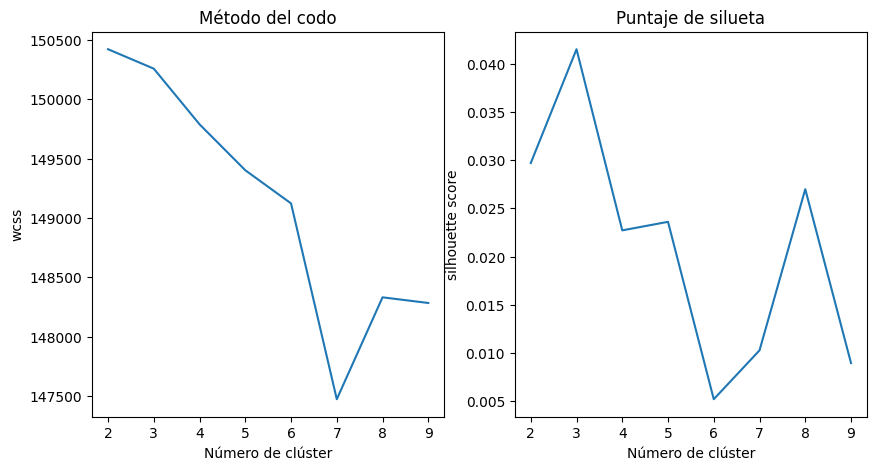

In [ ]:
silueta_score=[] # puntaje de silueta
wcss =[] #
n_clusters= range( 2,10)
for k in n_clusters:
  k_means=KMeans(k, random_state=42)
  k_means.fit(X_count)
  wcss.append(k_means.inertia_ )
  silueta = silhouette_score(X_count, k_means.labels_)
  silueta_score.append(silueta)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(n_clusters,wcss)
axs[0].set_title("Método del codo")
axs[0].set_xlabel("Número de clúster" )
axs[0].set_ylabel("wcss" )
axs[1].plot( n_clusters,silueta_score)
axs[1].set_title("Puntaje de silueta")
axs[1].set_xlabel("Número de clúster" )
axs[1].set_ylabel("silhouette score" )
plt.show()